<a href="https://colab.research.google.com/github/jeremy-08-ed/PraktikumML/blob/main/LaprakML_A2_24060119130071_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas Praktikum 5 Machine Learning
Nama: Handhika Pranata Kusuma Wardana<br>
NIM: 24060121140112<br>
Kelas: C <br>


# Clustering on Random Dataset

Terdapat 3 teknik dalam pengelompokkan Agglomerative Clustering:
- Single Linkage: menggabungkan cluster berdasarkan jarak terdekat
- Average Linkage: menggabungkan cluster berdasarkan jarak rata-rata
- Complete Linkage: menggabungkan cluster berdasarkan jarak terjauh

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import scipy
import scipy.cluster.hierarchy
import pylab
import matplotlib.cm as cm
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

##Import Dataset

In [ ]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

##Plotting Random Data

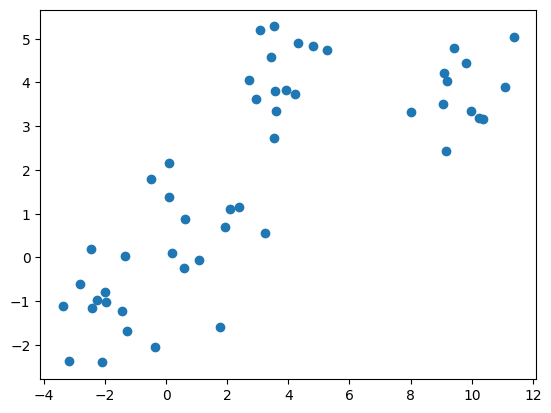

In [ ]:
plt.scatter(X1[:,0], X1[:, 1], marker='o')

### Single Linkage

In [ ]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='single')
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

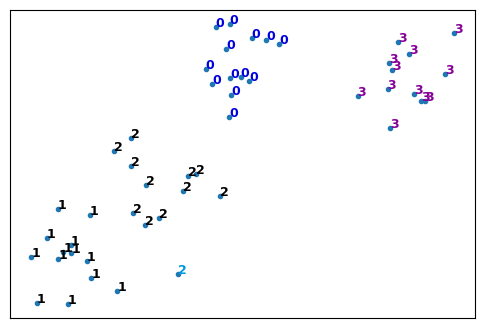

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down
# Or else the data points will be scattered very far apart

# Create a minimum and maximum range of X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints
for i in range(X1.shape[0]):
  plt.text(X1[i,0], X1[i,1], str(y1[i]),
           color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
           fontdict={'weight': 'bold', 'size':9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])

# Display the plot of the original data before clustering
plt.scatter(X1[:,0], X1[:, 1], marker='.')
plt.show()

### Average Linkage

In [ ]:
agglom2 = AgglomerativeClustering(n_clusters=4, linkage='average')
agglom2.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

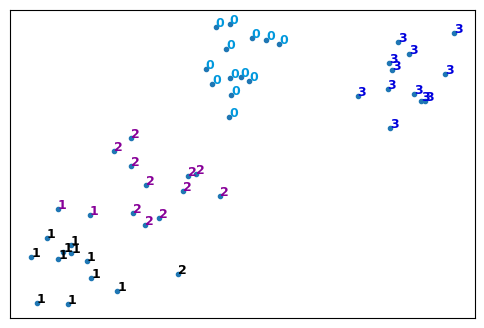

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down
# Or else the data points will be scattered very far apart

# Create a minimum and maximum range of X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints
for i in range(X1.shape[0]):
  plt.text(X1[i,0], X1[i,1], str(y1[i]),
           color=plt.cm.nipy_spectral(agglom2.labels_[i] / 10.),
           fontdict={'weight': 'bold', 'size':9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])

# Display the plot of the original data before clustering
plt.scatter(X1[:,0], X1[:, 1], marker='.')
plt.show()

### Complete Linkage

In [ ]:
agglom3 = AgglomerativeClustering(n_clusters=4, linkage='complete')
agglom3.fit(X1, y1)

AgglomerativeClustering(linkage='complete', n_clusters=4)

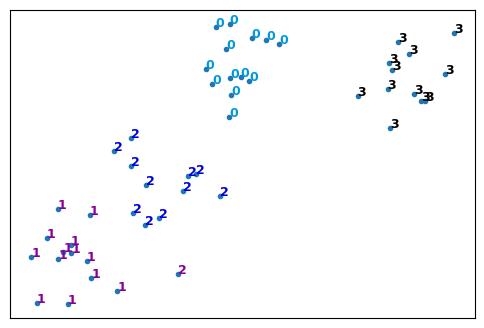

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down
# Or else the data points will be scattered very far apart

# Create a minimum and maximum range of X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints
for i in range(X1.shape[0]):
  plt.text(X1[i,0], X1[i,1], str(y1[i]),
           color=plt.cm.nipy_spectral(agglom3.labels_[i] / 10.),
           fontdict={'weight': 'bold', 'size':9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])

# Display the plot of the original data before clustering
plt.scatter(X1[:,0], X1[:, 1], marker='.')
plt.show()

Tidak ada perbedaan di plot dalam setiap teknik yang ada.

## Dendrogram

In [ ]:
dist_matrix = distance_matrix(X1, X1)
print(dist_matrix)
print(len(dist_matrix))

[[0.         0.38831152 0.3503991  ... 0.37104063 0.46247206 0.66721839]
 [0.38831152 0.         0.14660584 ... 0.08002194 0.32293808 0.29107434]
 [0.3503991  0.14660584 0.         ... 0.06806086 0.18683237 0.41153443]
 ...
 [0.37104063 0.08002194 0.06806086 ... 0.         0.24417958 0.34817986]
 [0.46247206 0.32293808 0.18683237 ... 0.24417958 0.         0.53569487]
 [0.66721839 0.29107434 0.41153443 ... 0.34817986 0.53569487 0.        ]]
50


In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')
X = hierarchy.linkage(dist_matrix, 'single')
Y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-11-8c20c589fed7>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')
<ipython-input-11-8c20c589fed7>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-11-8c20c589fed7>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


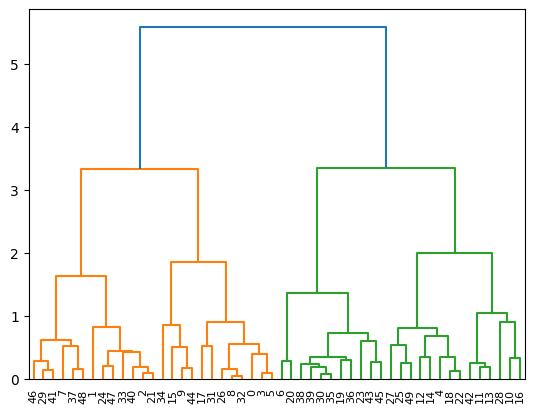

In [ ]:
# complete
dendro = hierarchy.dendrogram(Z)

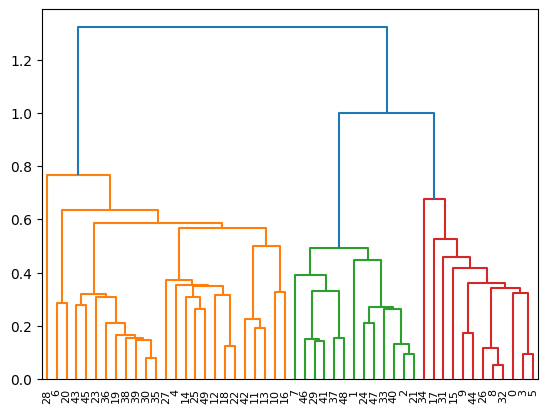

In [ ]:
# single
dendro = hierarchy.dendrogram(X)

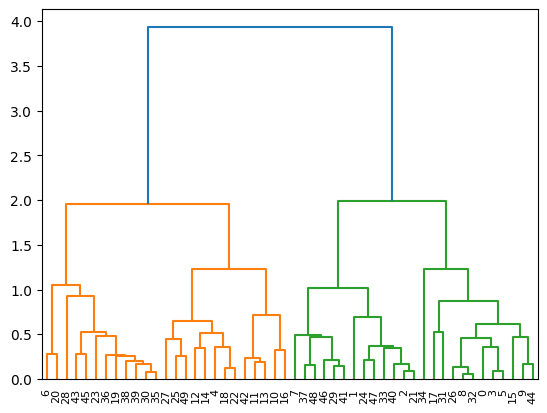

In [ ]:
# average
dendro = hierarchy.dendrogram(Y)

Sumbu y di dalam dendrogram merupakan jarak dari tiap cluster

Perbedaan yang paling terlihat adalah sumbu y pada tiap teknik dendrogram. Pada complete linkage, jarak terjauh mencapai > 5. Pada average linkage, jarak terjauh mencapai > 3.5. Pada single linkage, jarak terjauh mencapai > 1.6. Hal ini dikarenakan complete linkage memilih jarak cluster terjauh (antarcluster yang lain) setelah melakukan clustering pada 2 cluster yang berbeda.

#Clustering on Vehicle Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dikaapranata/PraktikumML/main/cars_clus.csv')
print('Shape of dataset: ', df.shape)

df.head()

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


##Data Cleaning

In [ ]:
print('Shape of dataset before cleaning: ', df.shape)
df[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas',
    'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas',
    'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

df = df.dropna()
df = df.reset_index(drop=True)
print('Shape of dataset after cleaning: ', df.shape)
df.head()

Shape of dataset before cleaning:  (159, 16)
Shape of dataset after cleaning:  (117, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


##Feature Selection

In [ ]:
featureset = df [['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [ ]:
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

##Clustering With Scipy

In [ ]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
  for j in range(leng):
    D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-19-8d47f9d75c0a>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng, leng])


### Single Linkage

In [ ]:
X = hierarchy.linkage(D, 'single')

<ipython-input-20-b6f6c2f2fae1>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')


In [ ]:
max_d = 3
clusters = fcluster(X, max_d, criterion="distance")
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

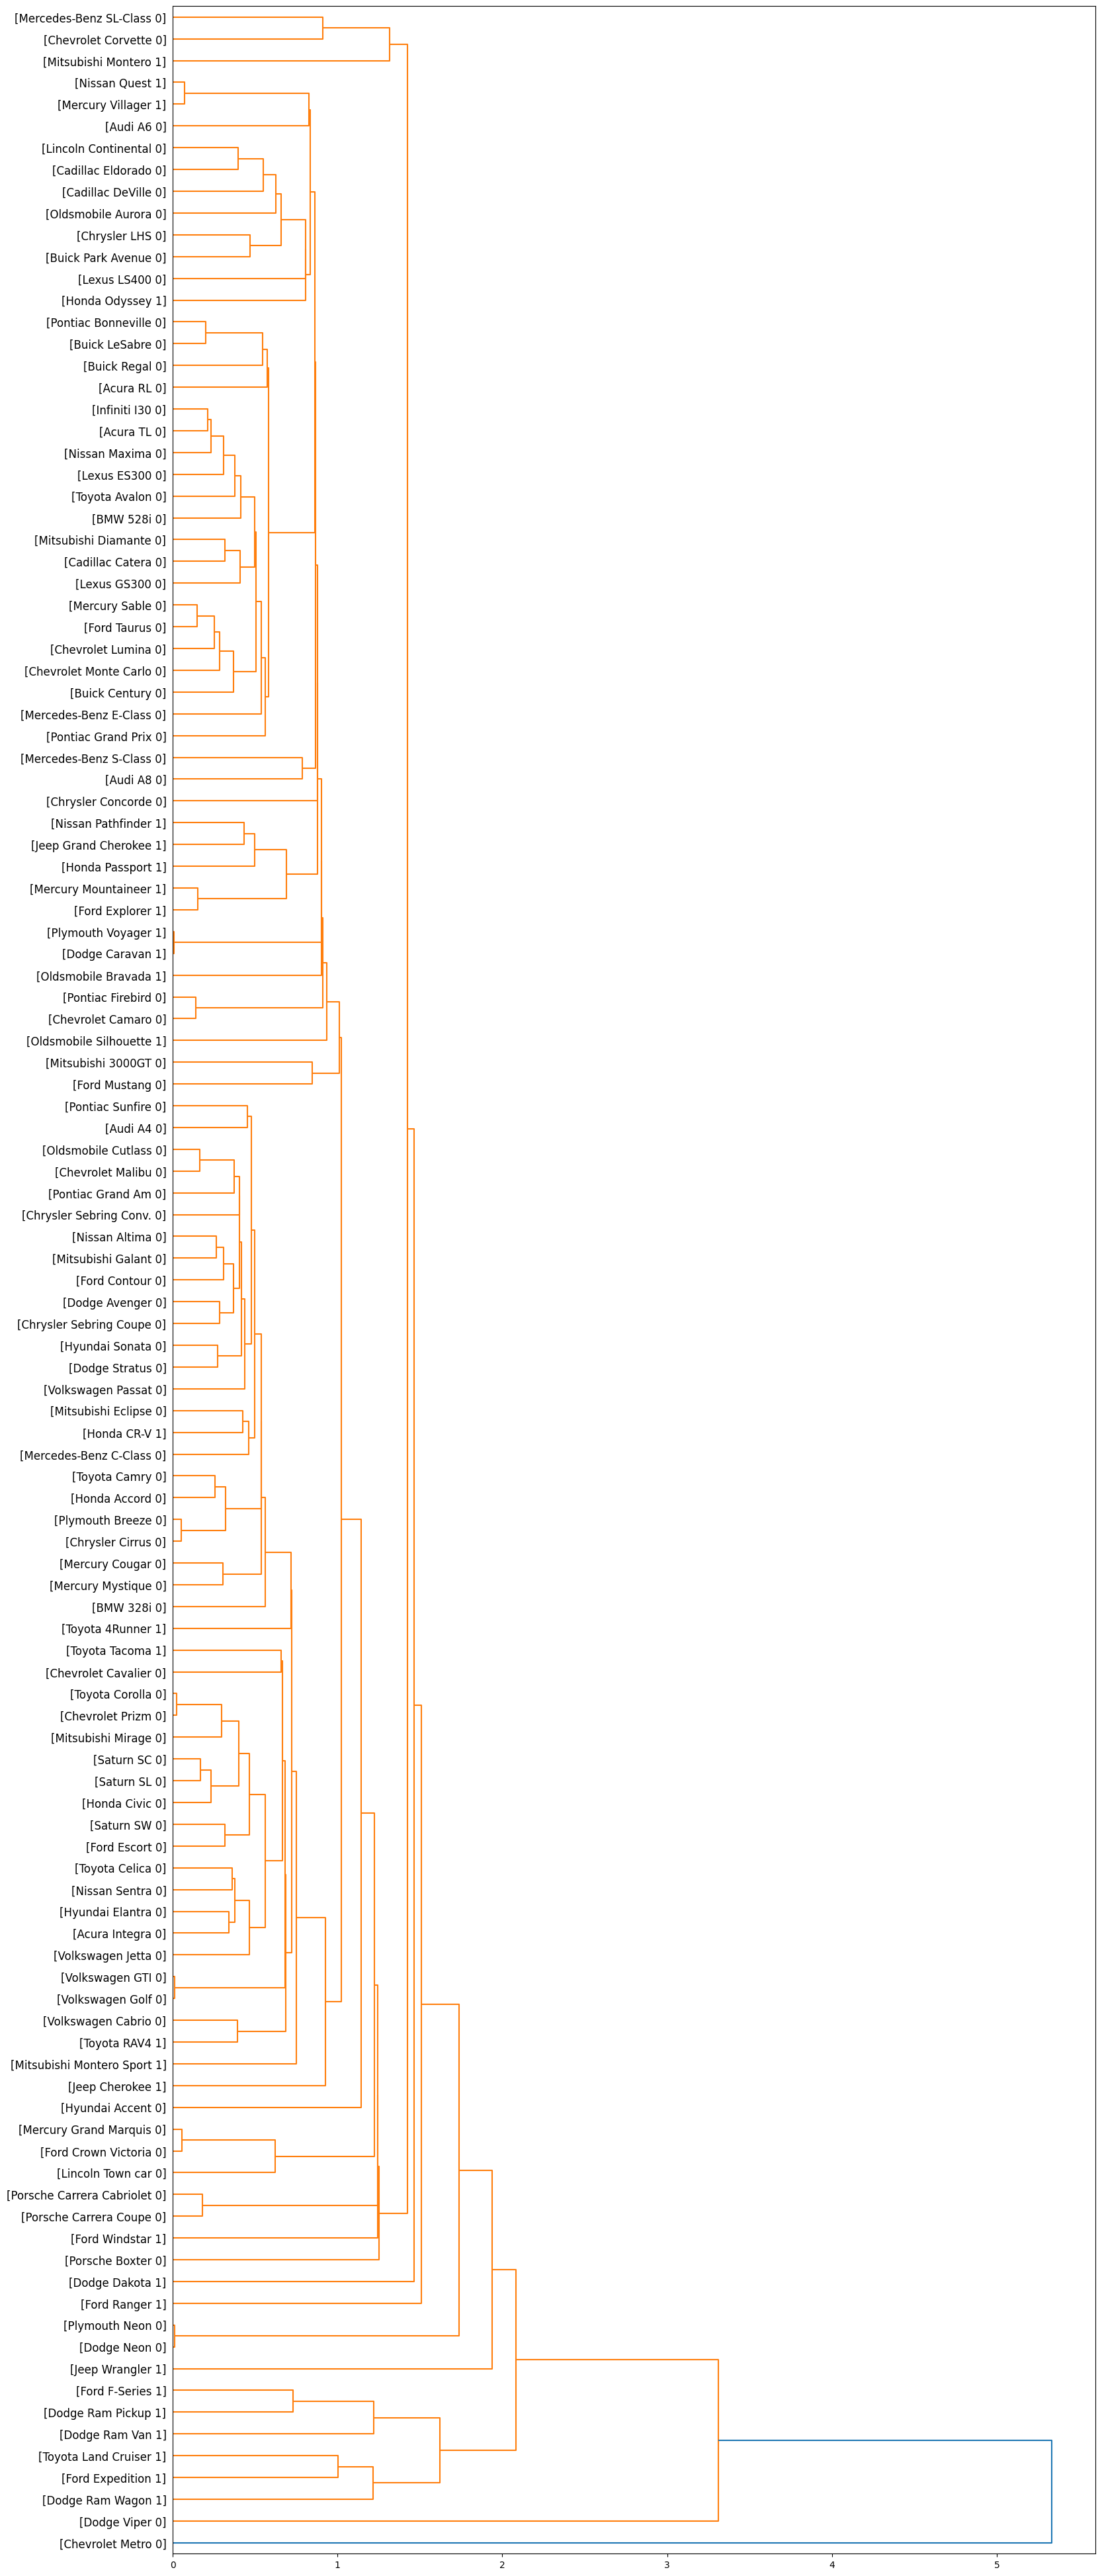

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])))

dendro = hierarchy.dendrogram(X, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation="right")

### Average Linkage

In [ ]:
Y = hierarchy.linkage(D, 'average')

<ipython-input-23-e98446c99915>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')


In [ ]:
max_d = 3
clusters = fcluster(Y, max_d, criterion="distance")
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

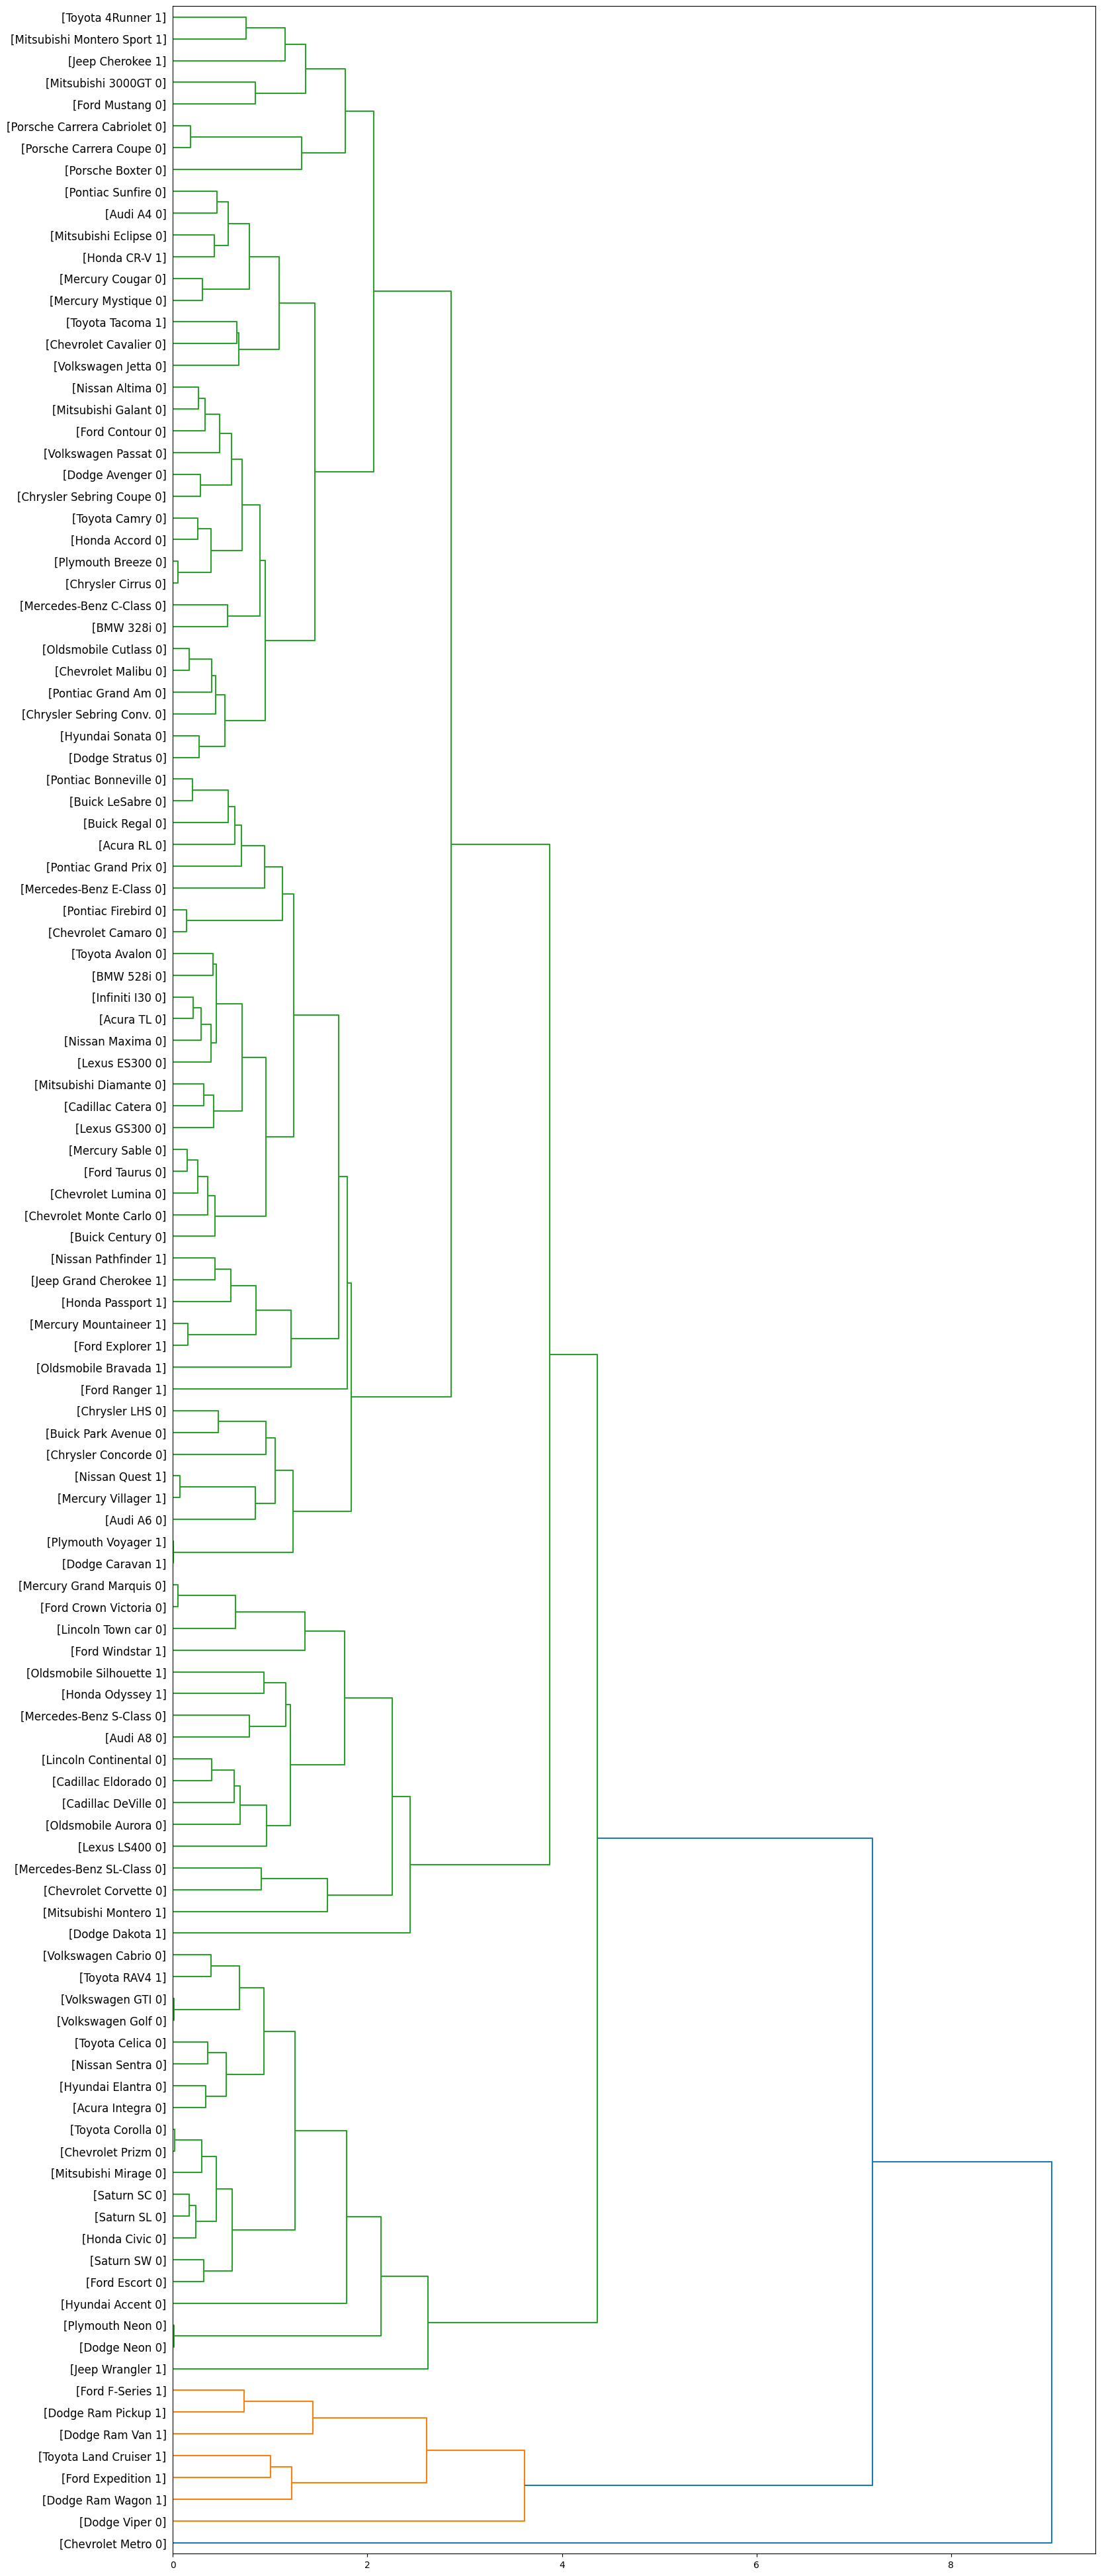

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])))

dendro = hierarchy.dendrogram(Y, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation="right")

### Complete Linkage

In [ ]:
Z = hierarchy.linkage(D, 'complete')

<ipython-input-26-f7fd5c287128>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [ ]:
max_d = 3
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

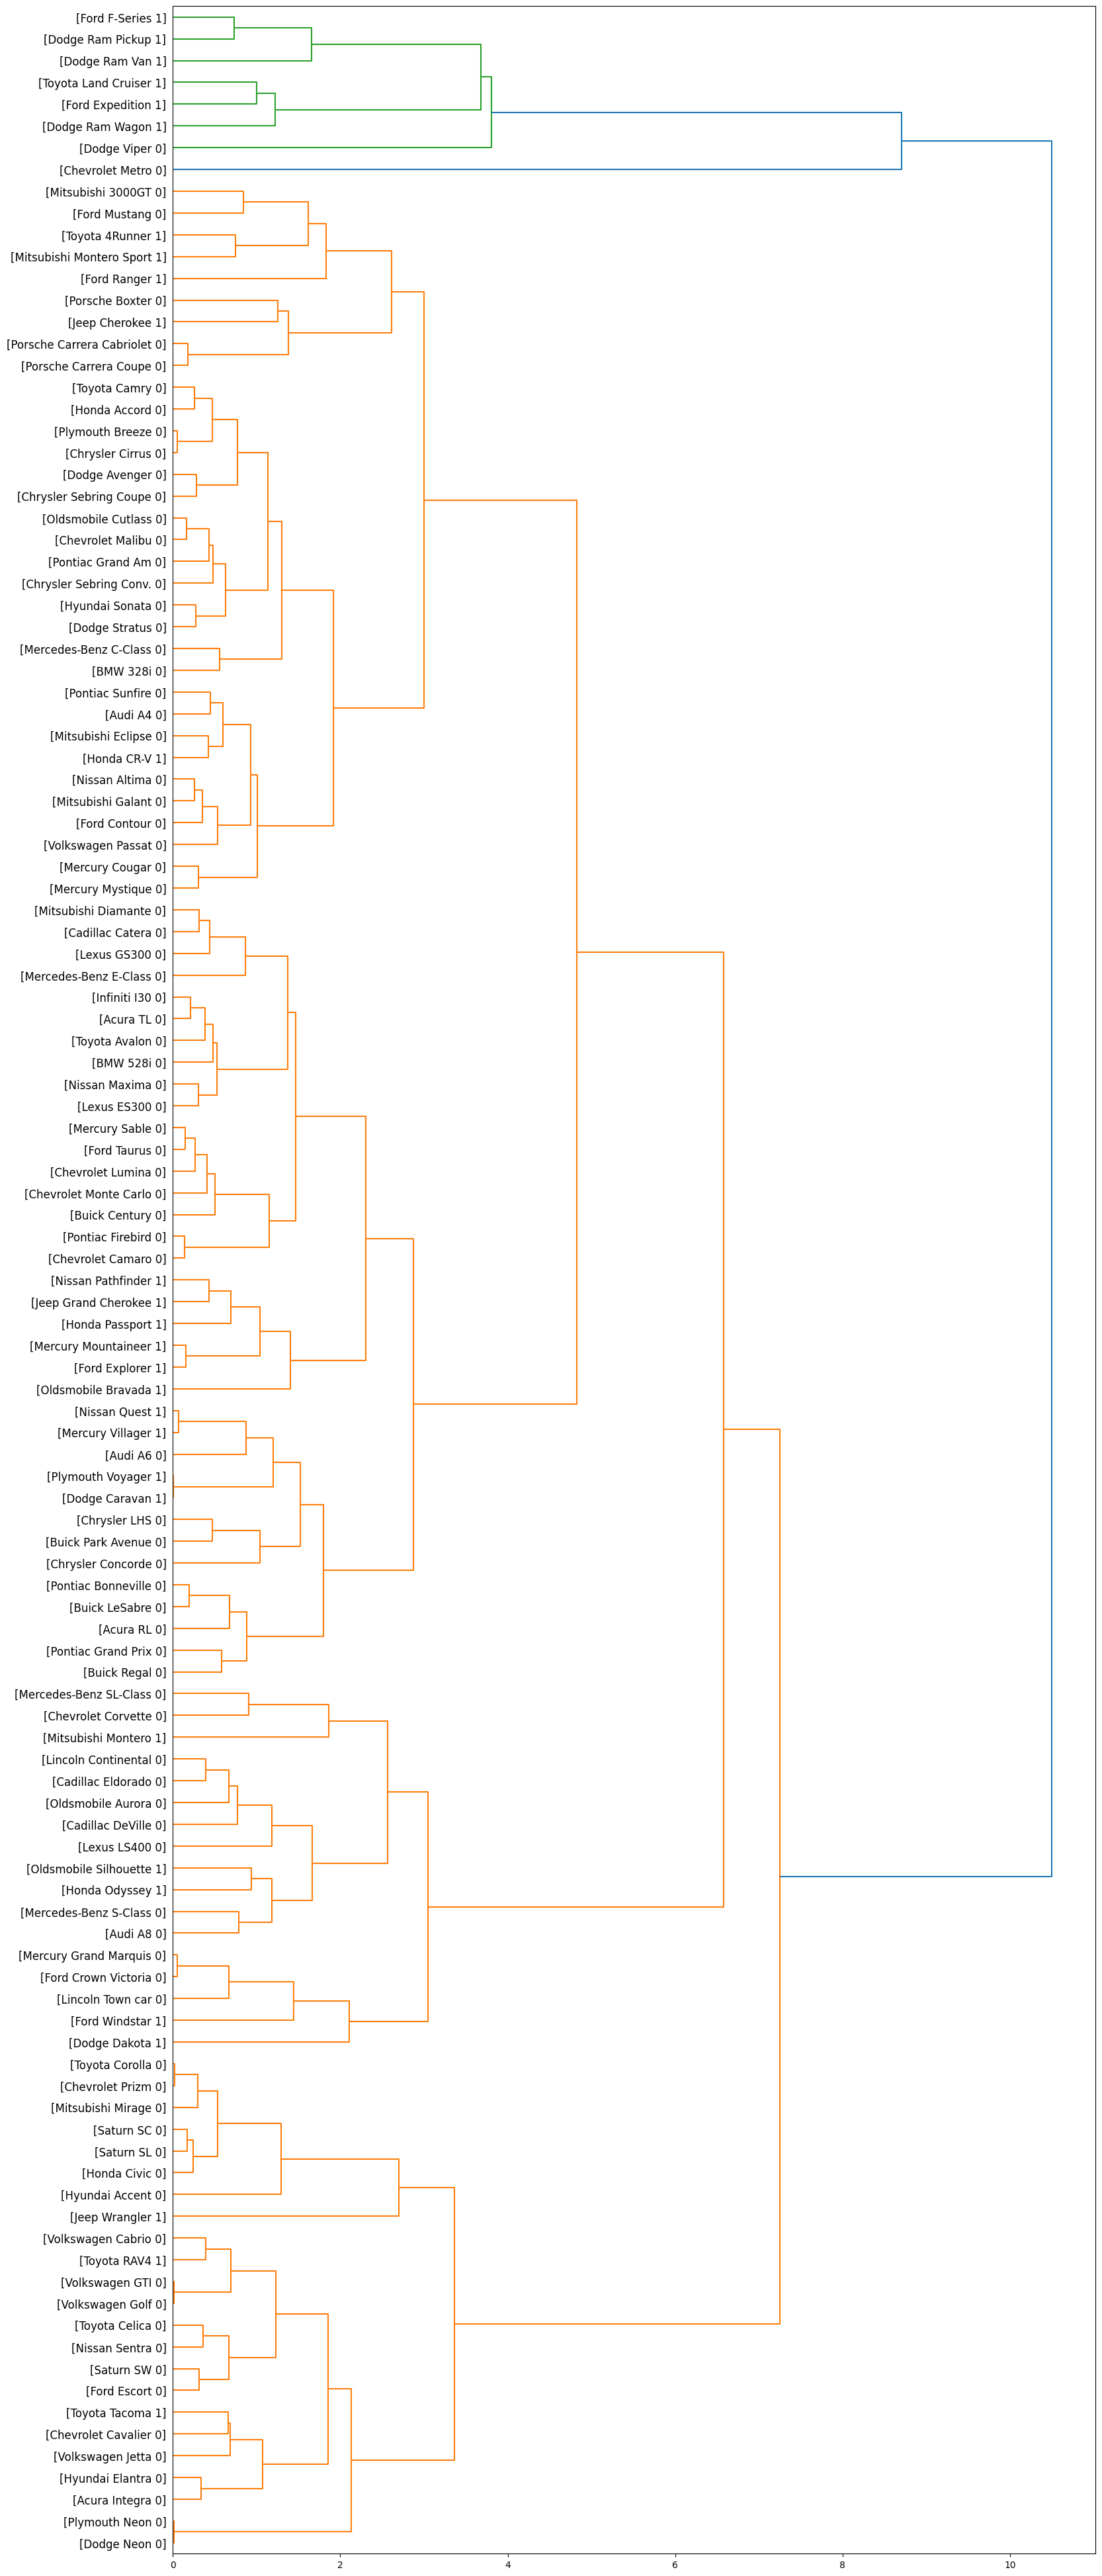

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])))

dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation="right")

Jika dilihat secara detail, clustering yang dilakukan pada single linkage memiliki jarak yang sangat kecil (rangenya kecil), tidak seperti complete linkage yang memiliki range besar pada dendrogram.

##Clustering With Scikit-Learn

In [ ]:
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


### Single Linkage

In [ ]:
agglom2 = AgglomerativeClustering(n_clusters = 5, linkage = 'single')
agglom2.fit(feature_mtx)
agglom2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1])

In [ ]:
df['cluster2_'] = agglom2.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster2_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,1
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,1
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,1


<ipython-input-32-9cf457486f3e>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

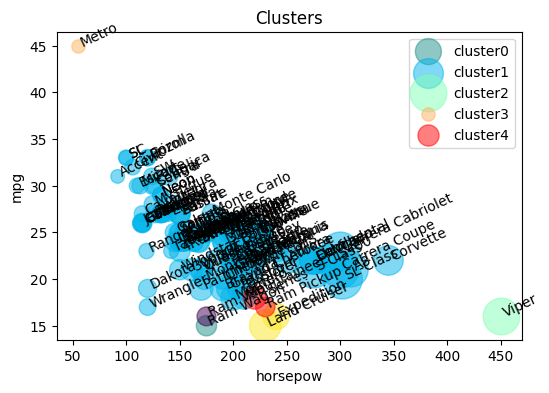

In [ ]:
n_clusters = max(agglom2.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df[df.cluster2_ == label]
  for i in subset.index:
    plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [ ]:
df.groupby(['cluster2_', 'type'])['cluster2_'].count()

cluster2_  type
0          1.0      4
1          0.0     86
           1.0     23
2          0.0      1
3          0.0      1
4          1.0      2
Name: cluster2_, dtype: int64

In [ ]:
agg_cars2 = df.groupby(['cluster2_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()
agg_cars2

<ipython-input-34-89f651c0bc2f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars2 = df.groupby(['cluster2_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s       mpg      price
cluster2_ type                                           
0         1.0   205.000000  4.275000  15.50000  31.938250
1         0.0   181.197674  2.902326  25.35814  26.286779
          1.0   167.478261  3.095652  21.00000  22.811261
2         0.0   450.000000  8.000000  16.00000  69.725000
3         0.0    55.000000  1.000000  45.00000   9.235000
4         1.0   225.000000  4.900000  17.50000  23.197500

<ipython-input-35-4bdc0a299a00>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

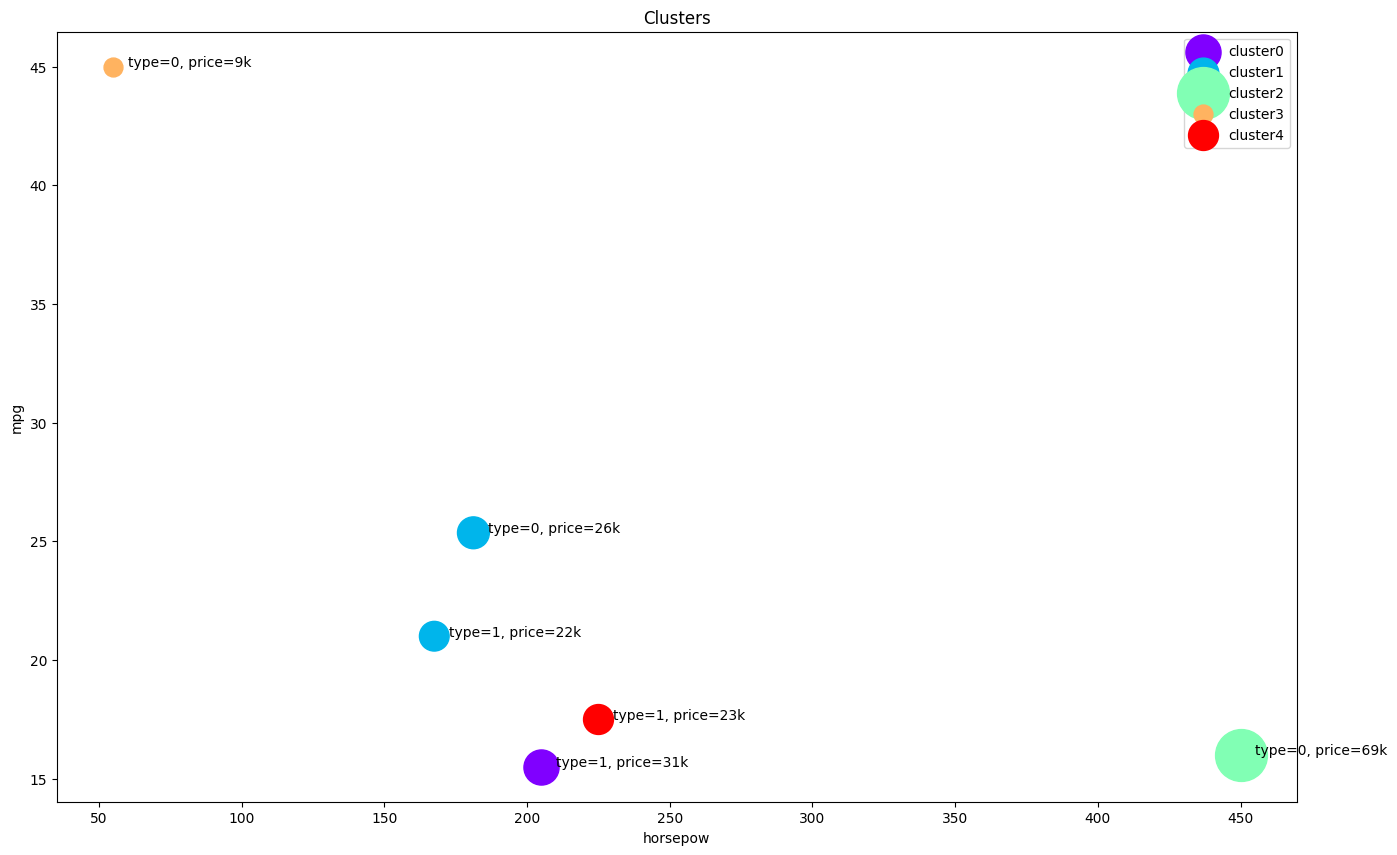

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_cars2.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3])) +'k')
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

### Average Linkage

In [ ]:
agglom3 = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
agglom3.fit(feature_mtx)
agglom3.labels_

array([2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 1, 2,
       3, 2, 2, 4, 2, 4, 2, 2, 2, 1, 0, 0, 0, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       0, 4, 0, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 1, 2, 2, 4, 4, 4, 2, 4,
       4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2])

In [ ]:
df['cluster3_'] = agglom3.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster2_,cluster3_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,1,2
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,1,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,1,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,1,2
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,1,4


<ipython-input-38-6389274f154a>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

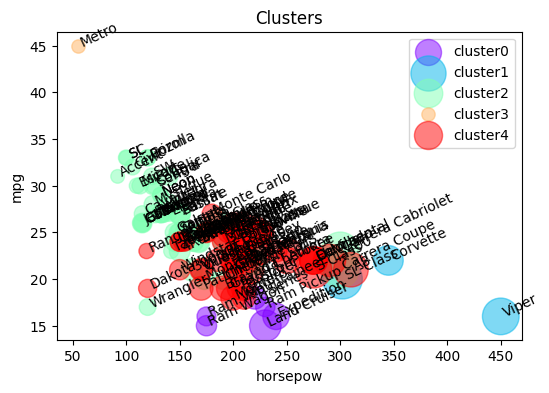

In [ ]:
n_clusters = max(agglom3.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df[df.cluster3_ == label]
  for i in subset.index:
    plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [ ]:
df.groupby(['cluster3_', 'type'])['cluster3_'].count()

cluster3_  type
0          1.0      6
1          0.0      3
2          0.0     47
           1.0      7
3          0.0      1
4          0.0     37
           1.0     16
Name: cluster3_, dtype: int64

In [ ]:
agg_cars3 = df.groupby(['cluster3_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()
agg_cars3

<ipython-input-40-36fdac74917b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars3 = df.groupby(['cluster3_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster3_ type                                            
0         1.0   211.666667  4.483333  16.166667  29.024667
1         0.0   365.666667  6.233333  19.333333  66.010000
2         0.0   146.531915  2.246809  27.021277  20.306128
          1.0   149.714286  2.657143  22.000000  18.551571
3         0.0    55.000000  1.000000  45.000000   9.235000
4         0.0   217.540541  3.602703  23.481081  31.837027
          1.0   175.250000  3.287500  20.562500  24.674875

<ipython-input-41-ff0d665d80a7>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

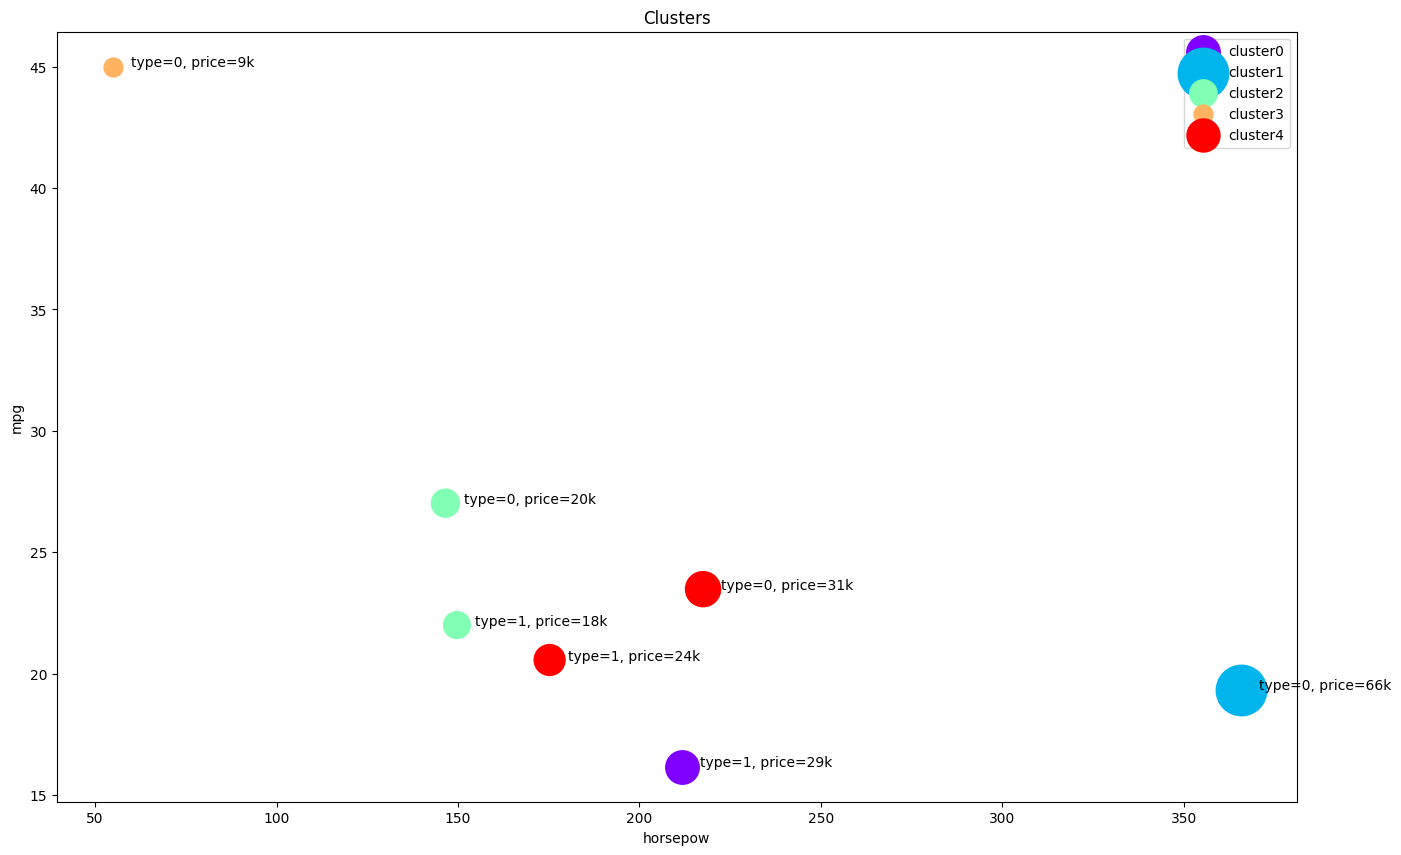

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_cars3.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3])) +'k')
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

### Complete Linkage

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 2, 3,
       4, 3, 3, 0, 3, 0, 3, 3, 3, 2, 1, 1, 1, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       1, 0, 1, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 2, 3, 3, 0, 0, 0, 3, 0,
       0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       0, 1, 3, 3, 3, 3, 3])

In [ ]:
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster2_,cluster3_,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,1,2,3
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,1,4,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,1,4,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,1,2,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,1,4,0


<ipython-input-44-8b93c957a424>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

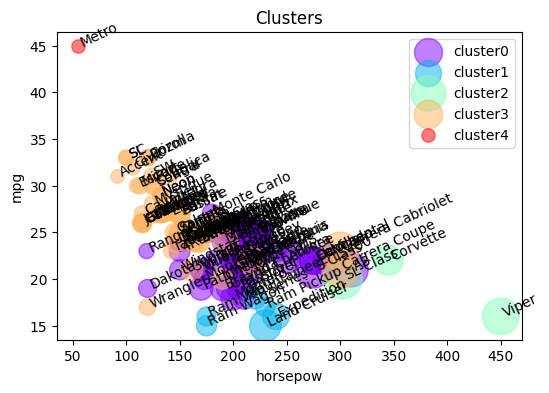

In [ ]:
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df[df.cluster_ == label]
  for i in subset.index:
    plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [ ]:
df.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     37
          1.0     18
1         1.0      6
2         0.0      3
3         0.0     47
          1.0      5
4         0.0      1
Name: cluster_, dtype: int64

In [ ]:
agg_cars = df.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()
agg_cars

<ipython-input-46-6d2b0482818f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   173.722222  3.238889  20.666667  24.422944
1        1.0   211.666667  4.483333  16.166667  29.024667
2        0.0   365.666667  6.233333  19.333333  66.010000
3        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
4        0.0    55.000000  1.000000  45.000000   9.235000

<ipython-input-47-4fed5cb64727>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


,horsepow,engine_s,mpg,price
type,,,,
0.0,55.0,1.0,45.0,9.235


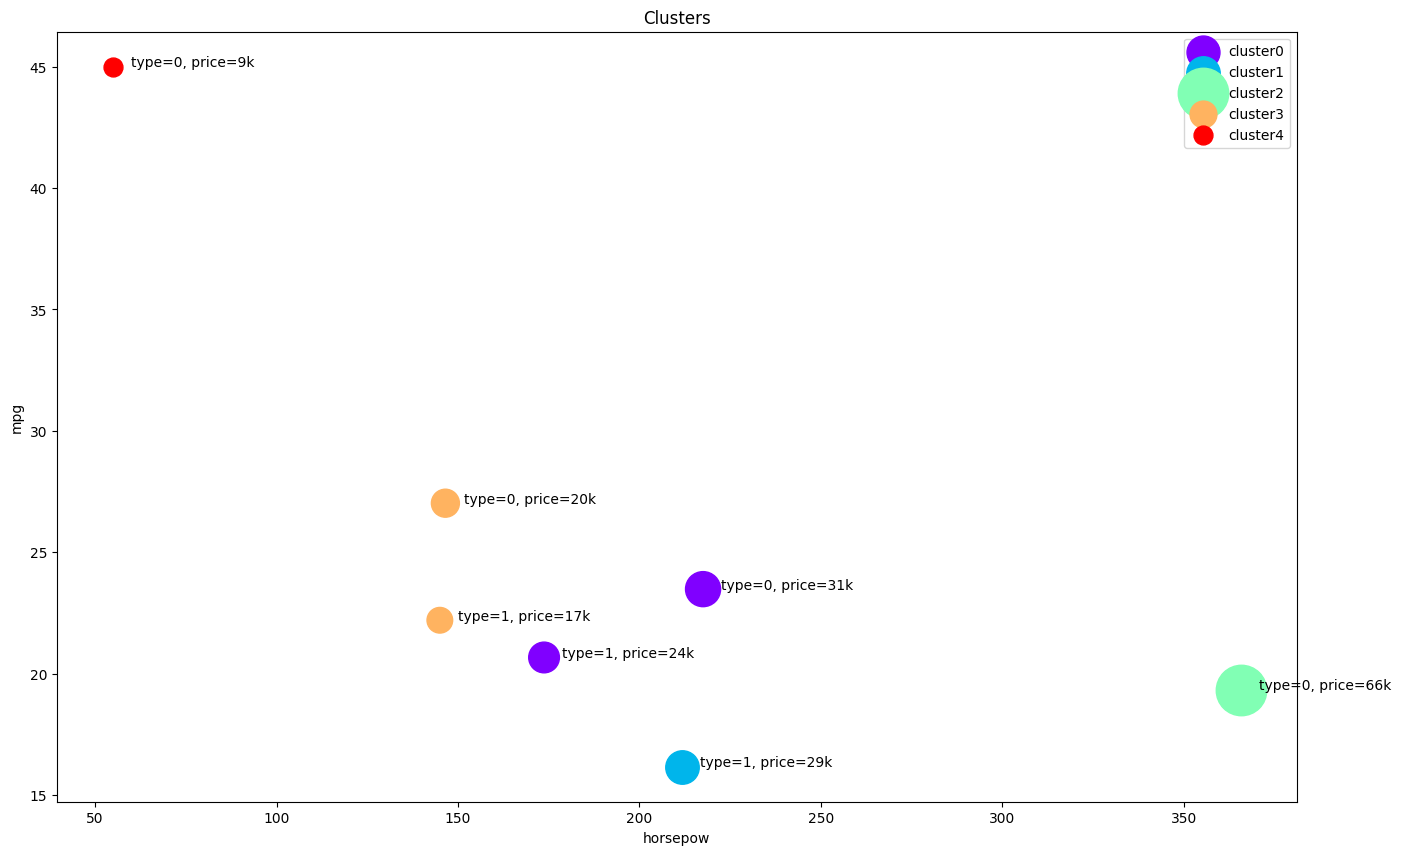

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3])) +'k')
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
subset

# Clustering on Iris Dataset

## Import Dataset

In [ ]:
from sklearn.datasets import load_iris

df1 = pd.read_csv('https://raw.githubusercontent.com/dikaapranata/PraktikumML/main/iris.data', names=['petal_length', 'petal_width', 'sepal_length', 'sepal_width', 'classes'])
df1.head()

,petal_length,petal_width,sepal_length,sepal_width,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x = df1[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]
min_max_scaler = MinMaxScaler()
feature_mtx1 = min_max_scaler.fit_transform(x)
feature_mtx1[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [ ]:
leng = feature_mtx1.shape[0]
A = scipy.zeros([leng, leng])
for i in range(leng):
  for j in range(leng):
    A[i, j] = scipy.spatial.distance.euclidean(feature_mtx1[i], feature_mtx1[j])

<ipython-input-50-d1fff381a6f9>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  A = scipy.zeros([leng, leng])


## Clustering petal_length and petal_width

### Single Linkage

In [ ]:
agglom_s = AgglomerativeClustering(n_clusters = 5, linkage = 'single')
agglom_s.fit(feature_mtx1)
agglom_s.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df1['cluster_'] = agglom_s.labels_
df1.head()

,petal_length,petal_width,sepal_length,sepal_width,classes,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2


<ipython-input-53-fa299e8b16aa>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'petal-width')

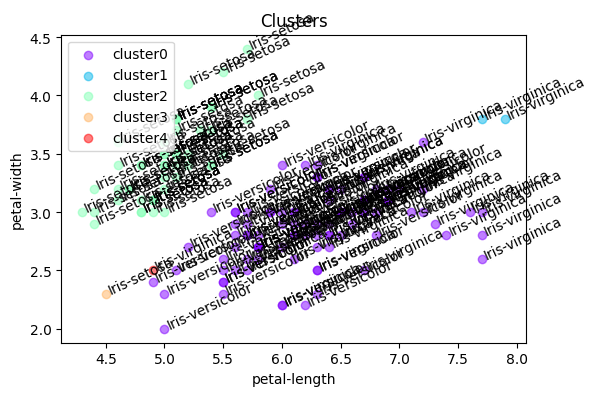

In [ ]:
n_clusters = max(agglom_s.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df1[df1.cluster_ == label]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], str(subset['classes'][i]), rotation=25)
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('petal-length')
plt.ylabel('petal-width')

In [ ]:
df1.groupby(['cluster_', 'classes'])['cluster_'].count()

cluster_  classes        
0         Iris-versicolor    50
          Iris-virginica     47
1         Iris-virginica      2
2         Iris-setosa        49
3         Iris-setosa         1
4         Iris-virginica      1
Name: cluster_, dtype: int64

In [ ]:
agg_petal = df1.groupby(['cluster_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()
agg_petal

<ipython-input-55-25c8c225a1dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_petal = df1.groupby(['cluster_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()


petal_length  petal_width  sepal_length  sepal_width
cluster_ classes                                                              
0        Iris-versicolor      5.936000     2.770000      4.260000     1.326000
         Iris-virginica       6.572340     2.948936      5.531915     2.029787
1        Iris-virginica       7.800000     3.800000      6.550000     2.100000
2        Iris-setosa          5.016327     3.440816      1.467347     0.242857
3        Iris-setosa          4.500000     2.300000      1.300000     0.300000
4        Iris-virginica       4.900000     2.500000      4.500000     1.700000

<ipython-input-56-00c5a4727209>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))


Text(0, 0.5, 'petal_width')

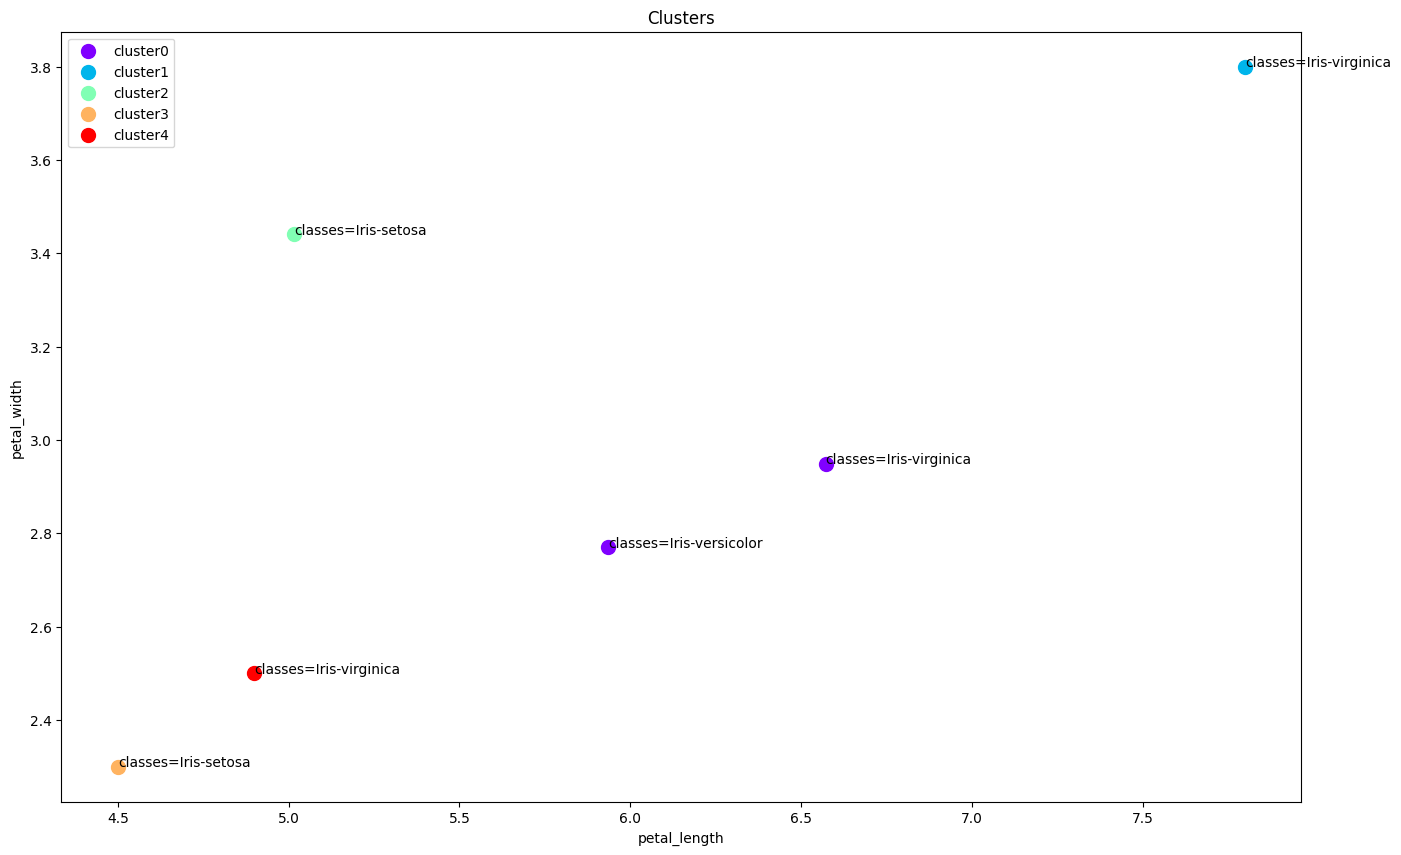

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_petal.loc[(label,),]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], 'classes='+str(i))
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

### Average Linkage

In [ ]:
agglom_a = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
agglom_a.fit(feature_mtx1)
agglom_a.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 0, 4, 0, 0, 0, 0, 2, 0, 4, 0,
       0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0,
       0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4])

In [ ]:
df1['cluster2_'] = agglom_a.labels_
df1.head()

,petal_length,petal_width,sepal_length,sepal_width,classes,cluster_,cluster2_
0,5.1,3.5,1.4,0.2,Iris-setosa,2,1
1,4.9,3.0,1.4,0.2,Iris-setosa,2,1
2,4.7,3.2,1.3,0.2,Iris-setosa,2,1
3,4.6,3.1,1.5,0.2,Iris-setosa,2,1
4,5.0,3.6,1.4,0.2,Iris-setosa,2,1


<ipython-input-59-96a459b025c9>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'petal-width')

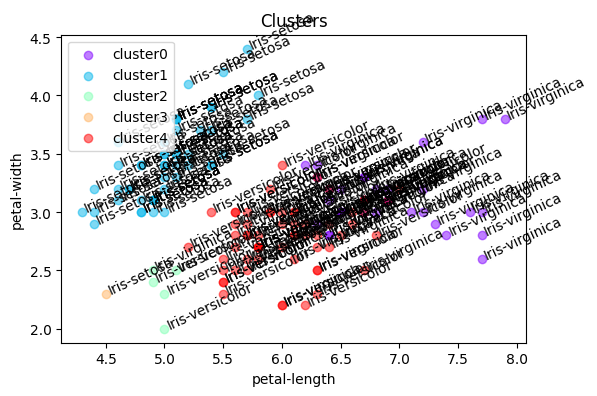

In [ ]:
n_clusters = max(agglom_a.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df1[df1.cluster2_ == label]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], str(subset['classes'][i]), rotation=25)
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('petal-length')
plt.ylabel('petal-width')

In [ ]:
df1.groupby(['cluster2_', 'classes'])['cluster2_'].count()

cluster2_  classes        
0          Iris-virginica     33
1          Iris-setosa        49
2          Iris-versicolor     4
           Iris-virginica      1
3          Iris-setosa         1
4          Iris-versicolor    46
           Iris-virginica     16
Name: cluster2_, dtype: int64

In [ ]:
z

<ipython-input-61-cfbdaa609210>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_petal2 = df1.groupby(['cluster2_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()


petal_length  petal_width  sepal_length  \
cluster2_ classes                                                    
0         Iris-virginica       6.893939     3.118182      5.806061   
1         Iris-setosa          5.016327     3.440816      1.467347   
2         Iris-versicolor      5.000000     2.300000      3.275000   
          Iris-virginica       4.900000     2.500000      4.500000   
3         Iris-setosa          4.500000     2.300000      1.300000   
4         Iris-versicolor      6.017391     2.810870      4.345652   
          Iris-virginica       6.062500     2.706250      5.093750   

                           sepal_width  
cluster2_ classes                       
0         Iris-virginica      2.133333  
1         Iris-setosa         0.242857  
2         Iris-versicolor     1.025000  
          Iris-virginica      1.700000  
3         Iris-setosa         0.300000  
4         Iris-versicolor     1.352174  
          Iris-virginica      1.825000

<ipython-input-62-9f7e9ade7cf1>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))


Text(0, 0.5, 'petal_width')

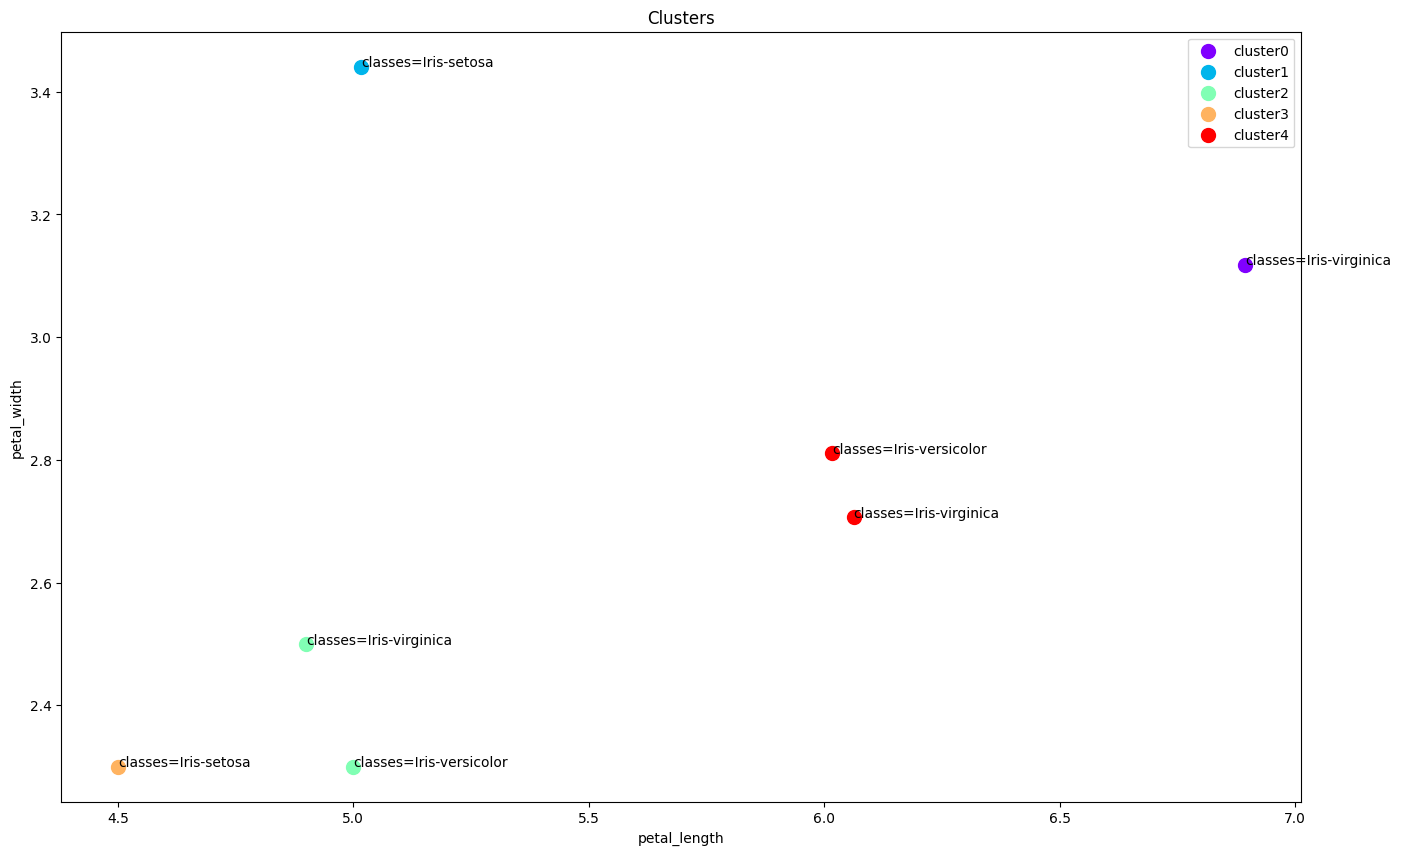

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_petal2.loc[(label,),]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], 'classes='+str(i))
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

### Complete Linkage

In [ ]:
agglom_c = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom_c.fit(feature_mtx1)
agglom_c.labels_

array([2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 2, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 0, 1, 0, 0, 0, 0, 4, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
df1['cluster3_'] = agglom_c.labels_
df1.head()

,petal_length,petal_width,sepal_length,sepal_width,classes,cluster_,cluster2_,cluster3_
0,5.1,3.5,1.4,0.2,Iris-setosa,2,1,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2,1,3
2,4.7,3.2,1.3,0.2,Iris-setosa,2,1,3
3,4.6,3.1,1.5,0.2,Iris-setosa,2,1,3
4,5.0,3.6,1.4,0.2,Iris-setosa,2,1,2


<ipython-input-65-dbb2f366622a>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'petal-width')

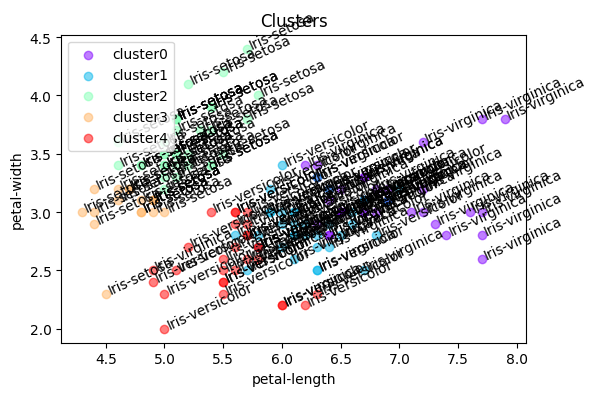

In [ ]:
n_clusters = max(agglom_c.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df1[df1.cluster3_ == label]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], str(subset['classes'][i]), rotation=25)
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('petal-length')
plt.ylabel('petal-width')

In [ ]:
df1.groupby(['cluster3_', 'classes'])['cluster3_'].count()

cluster3_  classes        
0          Iris-versicolor     1
           Iris-virginica     33
1          Iris-versicolor    22
           Iris-virginica     15
2          Iris-setosa        33
3          Iris-setosa        17
4          Iris-versicolor    27
           Iris-virginica      2
Name: cluster3_, dtype: int64

In [ ]:
agg_petal3 = df1.groupby(['cluster3_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()
agg_petal3

<ipython-input-67-32547e559666>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_petal3 = df1.groupby(['cluster3_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()


petal_length  petal_width  sepal_length  \
cluster3_ classes                                                    
0         Iris-versicolor      6.700000     3.000000      5.000000   
          Iris-virginica       6.893939     3.118182      5.806061   
1         Iris-versicolor      6.345455     2.977273      4.586364   
          Iris-virginica       6.066667     2.740000      5.100000   
2         Iris-setosa          5.172727     3.618182      1.487879   
3         Iris-setosa          4.682353     3.029412      1.417647   
4         Iris-versicolor      5.574074     2.592593      3.966667   
          Iris-virginica       5.450000     2.350000      4.750000   

                           sepal_width  
cluster3_ classes                       
0         Iris-versicolor     1.700000  
          Iris-virginica      2.133333  
1         Iris-versicolor     1.450000  
          Iris-virginica      1.846667  
2         Iris-setosa         0.275758  
3         Iris-setosa         0.182353  
4         Iris-versicolor     1.211111  
          Iris-virginica      1.600000

<ipython-input-68-72d4872021ab>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))


Text(0, 0.5, 'petal_width')

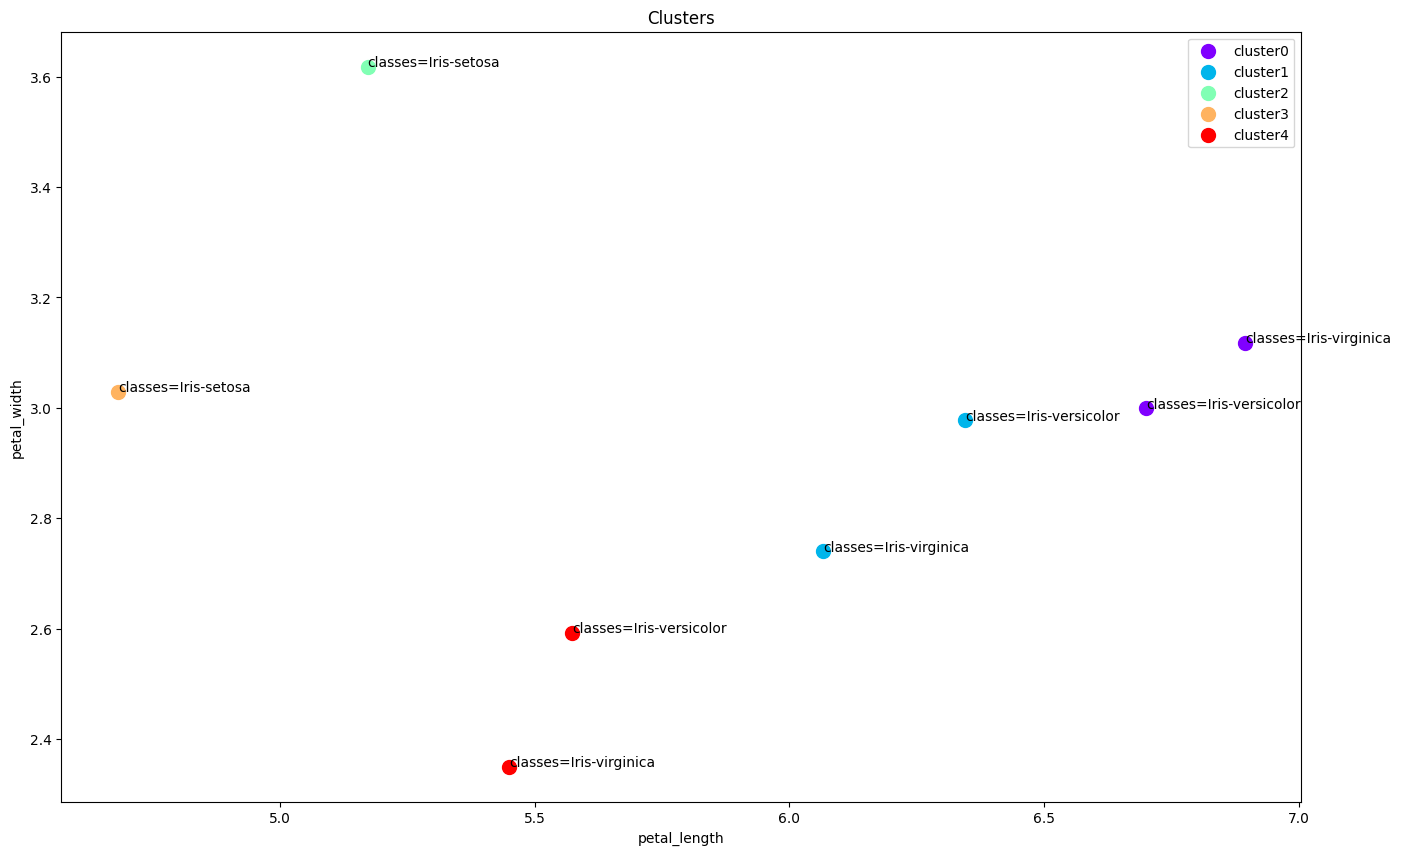

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_petal3.loc[(label,),]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], 'classes='+str(i))
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')